In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-65.24561699528793 99.95778589337749
10.245776091459092 -113.60948170863965
-69.70119901654694 136.57033031962612
22.96425732936055 48.75018335379593
-85.57885968038374 -103.51839648693532
2.8517875756377435 162.47971126553392
-1.7840647270093655 -169.3214990654042
-13.7475714992988 -141.9795427867683
-72.62226515307273 133.09862794040498
-78.82598968638108 113.05255678717856
-15.232667647757822 -84.50421918546607
-23.93463402580072 81.15827665022596
-47.480765703692015 -108.62443144093625
-81.76585649899158 156.03872081422202
72.61832680417518 -81.75448426011498
67.10680243125606 -143.8549638443584
38.51840250841096 101.84506514916296
-3.840900519288752 -94.08797254263166
-22.911428213676047 4.135576152490273
81.61340967599185 -32.976283481106265
-87.79620713161705 132.43330284051672
-60.12755305464254 -101.16137539134466
43.98454498443587 57.97810129653956
-64.92805935708188 12.047403926568336
-14.365011943989217 150.9498195075492
55.876903576898485 166.81869316602229
-81.50272657325

-30.229403459261917 97.98423192617167
17.35343692422809 -116.68076709773067
47.65382361079443 127.19052736552254
-37.63607693755209 -112.12896867828171
-52.39917822531404 35.613543972047864
-79.09915444018336 102.873857450613
-20.498214797779838 -41.773940695372715
-37.68960619308905 178.915360181349
-22.588062966953004 -4.27243439177181
72.66478078800895 179.2570125794382
26.840844119267118 131.92342817828455
85.76670801094917 104.07527390056333
43.87559928893438 120.41028737632189
71.30298738956736 -68.75102309726087
44.93880670739105 159.12205213671535
61.61289927435371 18.107345231688782
-37.51750927589939 40.83103731317877
62.22681437129333 -134.37287621266915
58.64770411376003 105.31255572551646
43.609697905037876 -16.50892994835388
-81.81241173393728 -84.68514936730251
46.55455795769495 47.14880390203527
-0.4881905625034335 -76.86201637533958
-65.57090717524379 -4.9530729760920735
32.18228300001482 7.462406660846511
-84.07775684785534 97.5940194283491
39.90632700101068 113.94440

In [9]:
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

655

In [13]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

#Build basic URL with the API key added
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [14]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [16]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | riyadh
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | saleaula
City not found. Skipping...
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | hualmay
Processing Record 11 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | fairbanks
Processing Record 16 of Set 1 | jinchang
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | henties bay
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | hobart
Processing Recor

Processing Record 32 of Set 4 | luganville
Processing Record 33 of Set 4 | portland
Processing Record 34 of Set 4 | richards bay
Processing Record 35 of Set 4 | sambava
Processing Record 36 of Set 4 | georgetown
Processing Record 37 of Set 4 | stjordalshalsen
Processing Record 38 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 39 of Set 4 | saint george
Processing Record 40 of Set 4 | brooks
Processing Record 41 of Set 4 | bathsheba
Processing Record 42 of Set 4 | makokou
Processing Record 43 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 44 of Set 4 | lokosovo
Processing Record 45 of Set 4 | galiwinku
City not found. Skipping...
Processing Record 46 of Set 4 | kahului
Processing Record 47 of Set 4 | arlit
Processing Record 48 of Set 4 | mizan teferi
Processing Record 49 of Set 4 | menongue
Processing Record 50 of Set 4 | falmouth
Processing Record 1 of Set 5 | ahipara
Processing Record 2 of Set 5 | kokstad
Processing Record 3 of Set 5 | ekiba

Processing Record 19 of Set 8 | longyearbyen
Processing Record 20 of Set 8 | ostrovnoy
Processing Record 21 of Set 8 | staryy nadym
Processing Record 22 of Set 8 | mizpe ramon
City not found. Skipping...
Processing Record 23 of Set 8 | ambon
Processing Record 24 of Set 8 | teocuitatlan de corona
Processing Record 25 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 26 of Set 8 | isangel
Processing Record 27 of Set 8 | metro
Processing Record 28 of Set 8 | kanniyakumari
Processing Record 29 of Set 8 | arroyo
Processing Record 30 of Set 8 | bilibino
Processing Record 31 of Set 8 | kilindoni
Processing Record 32 of Set 8 | moose factory
Processing Record 33 of Set 8 | lloydminster
Processing Record 34 of Set 8 | raudeberg
Processing Record 35 of Set 8 | dwarka
Processing Record 36 of Set 8 | grand centre
City not found. Skipping...
Processing Record 37 of Set 8 | beisfjord
Processing Record 38 of Set 8 | vila franca do campo
Processing Record 39 of Set 8 | hasaki
Proces

Processing Record 8 of Set 12 | petrokamenskoye
Processing Record 9 of Set 12 | teneguiban
City not found. Skipping...
Processing Record 10 of Set 12 | san rafael del sur
Processing Record 11 of Set 12 | pangody
Processing Record 12 of Set 12 | marcona
City not found. Skipping...
Processing Record 13 of Set 12 | uralets
Processing Record 14 of Set 12 | bargal
City not found. Skipping...
Processing Record 15 of Set 12 | le mars
Processing Record 16 of Set 12 | christiana
Processing Record 17 of Set 12 | taraz
Processing Record 18 of Set 12 | yamada
Processing Record 19 of Set 12 | hamilton
Processing Record 20 of Set 12 | tigil
Processing Record 21 of Set 12 | khandyga
Processing Record 22 of Set 12 | udala
Processing Record 23 of Set 12 | balaipungut
Processing Record 24 of Set 12 | grand forks
Processing Record 25 of Set 12 | nicolas ruiz
Processing Record 26 of Set 12 | tibati
Processing Record 27 of Set 12 | ossora
Processing Record 28 of Set 12 | farsund
Processing Record 29 of Set

In [17]:
len(city_data)

591

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,73.54,43,0,4.25,AU,2022-09-30 06:01:01
1,San Patricio,28.0170,-97.5169,73.83,60,0,4.41,US,2022-09-30 06:01:01
2,New Norfolk,-42.7826,147.0587,54.91,48,8,1.99,AU,2022-09-30 06:01:01
3,Riyadh,24.6877,46.7219,84.34,14,0,7.96,SA,2022-09-30 05:57:57
4,Punta Arenas,-53.1500,-70.9167,41.11,80,39,13.69,CL,2022-09-30 06:01:02
5,Butaritari,3.0707,172.7902,82.62,72,80,16.67,KI,2022-09-30 06:01:03
6,Atuona,-9.8000,-139.0333,76.91,65,1,18.61,PF,2022-09-30 06:01:04
7,Albany,42.6001,-73.9662,44.58,92,48,3.62,US,2022-09-30 06:00:13
8,Hualmay,-11.0964,-77.6139,59.97,84,34,8.72,PE,2022-09-30 06:01:05
9,Castro,-24.7911,-50.0119,50.25,97,100,8.21,BR,2022-09-30 06:01:05


In [21]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
updated_df = city_data_df[new_column_order]

In [22]:
updated_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2022-09-30 06:01:01,-33.6500,115.3333,73.54,43,0,4.25
1,San Patricio,US,2022-09-30 06:01:01,28.0170,-97.5169,73.83,60,0,4.41
2,New Norfolk,AU,2022-09-30 06:01:01,-42.7826,147.0587,54.91,48,8,1.99
3,Riyadh,SA,2022-09-30 05:57:57,24.6877,46.7219,84.34,14,0,7.96
4,Punta Arenas,CL,2022-09-30 06:01:02,-53.1500,-70.9167,41.11,80,39,13.69
5,Butaritari,KI,2022-09-30 06:01:03,3.0707,172.7902,82.62,72,80,16.67
6,Atuona,PF,2022-09-30 06:01:04,-9.8000,-139.0333,76.91,65,1,18.61
7,Albany,US,2022-09-30 06:00:13,42.6001,-73.9662,44.58,92,48,3.62
8,Hualmay,PE,2022-09-30 06:01:05,-11.0964,-77.6139,59.97,84,34,8.72
9,Castro,BR,2022-09-30 06:01:05,-24.7911,-50.0119,50.25,97,100,8.21


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

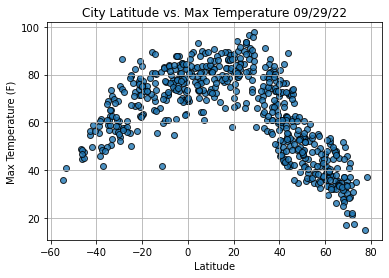

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

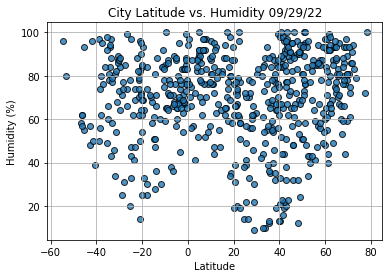

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()